<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LSTM-RF%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset%20ver.2(04062023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid LSTM-RF for 5 class classifications based on WSN-DS dataset ver.2**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

### **Data Preprocessing**

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=5)  # update to 4 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(374661, 18)
(374661, 5)


In [7]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid LSTM-RF for 5 class Ver.2**

In [9]:
# Train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(5, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=64)

# Extract features from LSTM model
train_lstm_features = lstm_model.predict(X_train_lstm)
test_lstm_features = lstm_model.predict(X_test_lstm)

# Train RF model with LSTM features as input
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_lstm_features, np.argmax(y_train, axis=1))

# Evaluate hybrid model on test set
test_rf_features = rf_model.predict(test_lstm_features)

print(confusion_matrix(np.argmax(y_test, axis=1), test_rf_features))
print(classification_report(np.argmax(y_test, axis=1), test_rf_features))

Epoch 1/15
21255/21255 [==============================] - 1557s 73ms/step - loss: 0.1934 - accuracy: 0.9058
Epoch 2/15
21255/21255 [==============================] - 1553s 73ms/step - loss: 0.0993 - accuracy: 0.9613
Epoch 3/15
21255/21255 [==============================] - 1591s 75ms/step - loss: 0.0675 - accuracy: 0.9776
Epoch 4/15
21255/21255 [==============================] - 1576s 74ms/step - loss: 0.0624 - accuracy: 0.9790
Epoch 5/15
21255/21255 [==============================] - 1628s 77ms/step - loss: 0.0594 - accuracy: 0.9800
Epoch 6/15
21255/21255 [==============================] - 1585s 75ms/step - loss: 0.0574 - accuracy: 0.9807
Epoch 7/15
21255/21255 [==============================] - 1573s 74ms/step - loss: 0.0562 - accuracy: 0.9811
Epoch 8/15
21255/21255 [==============================] - 1571s 74ms/step - loss: 0.0543 - accuracy: 0.9816
Epoch 9/15
21255/21255 [==============================] - 1567s 74ms/step - loss: 0.0518 - accuracy: 0.9824
Epoch 10/15
21255/21255 [===

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='copper')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ##plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  ##plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LSTM-RF Model


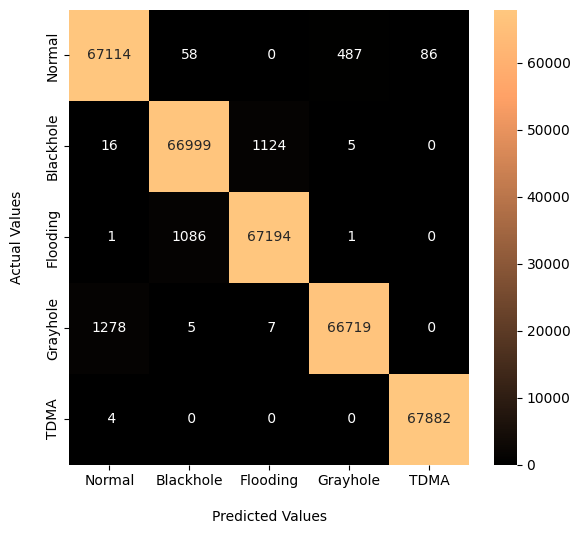

In [11]:
print("Confusion Matrix of Hybrid LSTM-RF Model") 
conf_mat(np.argmax(y_test, axis=1), test_rf_features)

In [12]:
report = classification_report(np.argmax(y_test, axis=1), test_rf_features, output_dict=True)
detection_rates = {}
for cls in range(5):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates of Hybrid LSTM-RF Model:", detection_rates)

Detection rates of Hybrid LSTM-RF Model: {0: 0.9906856594582626, 1: 0.9831973467950224, 2: 0.9840660789080578, 3: 0.9810319222455851, 4: 0.9999410776890669}


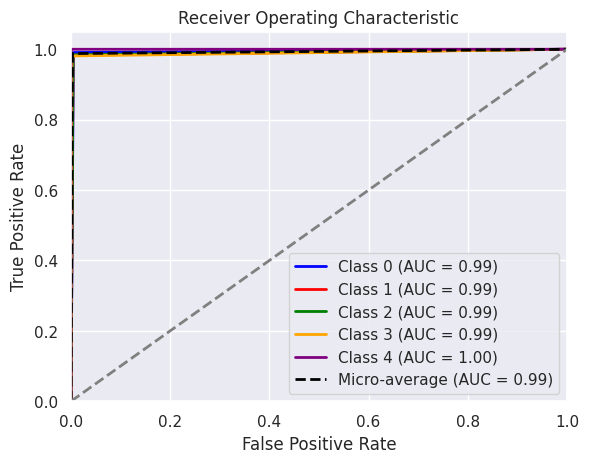

[[67114    58     0   487    86]
 [   16 66999  1124     5     0]
 [    1  1086 67194     1     0]
 [ 1278     5     7 66719     0]
 [    4     0     0     0 67882]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     67745
           1       0.98      0.98      0.98     68144
           2       0.98      0.98      0.98     68282
           3       0.99      0.98      0.99     68009
           4       1.00      1.00      1.00     67886

    accuracy                           0.99    340066
   macro avg       0.99      0.99      0.99    340066
weighted avg       0.99      0.99      0.99    340066



In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.utils import np_utils

# Convert y_test and test_rf_features to one-hot encoded format
y_test_onehot = np_utils.to_categorical(np.argmax(y_test, axis=1))
test_rf_features_onehot = np_utils.to_categorical(test_rf_features, num_classes=5)  # Convert to one-hot encoded format with 5 classes

# Compute the AUC and ROC curves for each class
n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_rf_features_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), test_rf_features_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', lw=2, linestyle='--', label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix and classification report
print(confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))
print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))